<a href="https://colab.research.google.com/github/vcbonani/Python/blob/main/Projeto_final_An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [99]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [172]:
dados.shape[0]
dados.sort_values(by='Renda', inplace = True)
dados.head()


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Estado
28833,29,1,40,8,4,0,1.770956,Bahia
16517,23,0,64,2,9,0,1.791577,Ceará
16523,23,1,30,8,9,0,1.623218,Ceará
16508,23,1,77,8,4,0,1.678816,Ceará
16509,23,0,19,8,11,0,1.625226,Ceará


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [173]:
salario_minimo = 788
print(f'Dados de renda - Mínimo: {dados.Renda.min()} ; Máximo: {dados.Renda.max()}')
                #classes:  E            E                    D                       C                 B                     A
classes_renda = [dados.Renda.min(), salario_minimo * 2, salario_minimo * 5, salario_minimo * 15, salario_minimo * 25 , dados.Renda.max()]
classes_renda

Dados de renda - Mínimo: 0 ; Máximo: 200000


[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [102]:
labels_classes_renda = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [103]:
frequencia_renda = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = classes_renda,
        labels = labels_classes_renda,
        include_lowest = True
    )
)

frequencia_renda

/tmp/ipython-input-3761967321.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia_renda = pd.value_counts(


,count
Renda,
E,49755
D,18602
C,7241
B,822
A,420


### 4º Construir a coluna de percentuais

In [104]:
percentual_renda = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = classes_renda,
        labels = labels_classes_renda,
        include_lowest = True
    ), normalize = True
) * 100

percentual_renda

/tmp/ipython-input-2984235971.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual_renda = pd.value_counts(


,proportion
Renda,
E,64.751432
D,24.208745
C,9.423477
B,1.069755
A,0.546590


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [105]:
df_renda_frequencia = pd.DataFrame({'Frequência Renda': frequencia_renda, 'Percentual (%)': percentual_renda})
df_renda_frequencia.sort_index(ascending = False, inplace = True)
df_renda_frequencia

,Frequência Renda,Percentual (%)
Renda,,
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

29559.285714285714 846.4361772686162


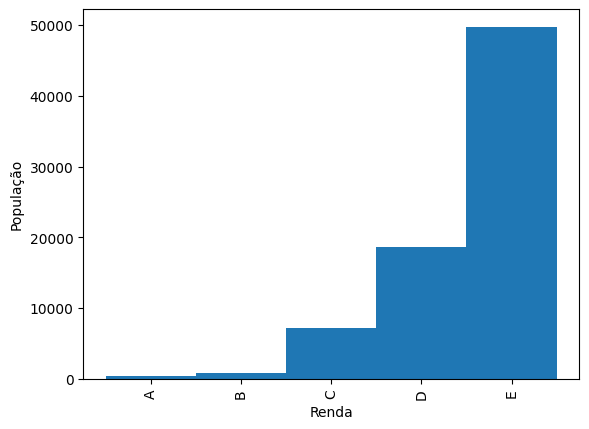

In [106]:
df_renda_frequencia['Frequência Renda'].plot.bar(width = 1, ylabel = 'População')
media_renda_a = dados.query('Renda > 19701').Renda.mean()
media_renda_e = dados.query('Renda < 1577').Renda.mean()
print(media_renda_a, media_renda_e)

#ax = sns.displot(dados.query('Renda > 19701').Renda)
#ax_2 = sns.displot(dados.query('Renda < 1577').Renda)

> ### Conclusões

Os dados de renda compreendem uma população de 76.840 pessoas. A renda foi dividida em 5 classes, sendo:

<b>A</b> ► Acima de 25 salários mínimos

<b>B</b> ► De 15 a 25 salários mínimos

<b>C</b> ► De 5 a 15 salários mínimos

<b>D</b> ► De 2 a 5 salários mínimos

<b>E</b> ► Até 2 salários mínimos

Considerando o salário mínimo de 788,00, pode-se observar que quase 65% da população respondente da pesquisa ganha até 2 salários mínimos mensais (1.576,00). Isso é contraste grande com a população que ganha acima de 25 salários mínimos (19.700,00) que corresponde a pouco mais de 0,5% da população da pesquisa. Considerando o preço de um iPhone 6 no início de janeiro de 2015, seu valor era de 3.500,00 (fonte: tudocelular.com). Para efeitos de comparação, a renda mensal média da classe A é de aproximadamente 29.559,00, com isso conseguiriam comprar à vista 8 celulares. Já a classe E, com uma renda média mensal de 846,00, levaria praticamente 5 meses para comprar 1 celular à vista.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<Axes: xlabel='Renda', ylabel='Count'>

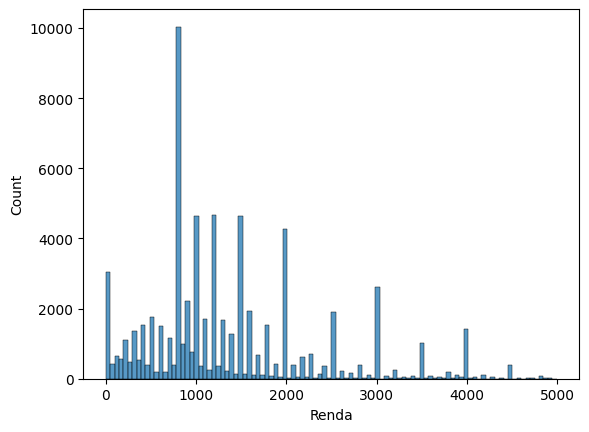

In [107]:
ax = sns.histplot(dados.query('Renda < 5000').Renda)
ax
#há uma grande população com renda entre 0 e 25000, acima disso há uma grande dispersão
#fazendo um recorte de renda entre 0 e 25000, a maior parte da população concentra-se entre 0 e 5000
#fazendo um recorte para menos de 5000, visualmente há uma grande população que recebe entre 0 e 2000

In [108]:
renda_moda = float(dados.Renda.mode())
renda_media = float(dados.Renda.mean())
renda_mediana = float(dados.Renda.median())
print(f'A moda da renda é: {renda_moda}, a média da renda é: {renda_media}, a mediana da renda é: {renda_mediana}')


A moda da renda é: 788.0, a média da renda é: 2000.3831988547631, a mediana da renda é: 1200.0


/tmp/ipython-input-1342575513.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  renda_moda = float(dados.Renda.mode())


0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64
0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64


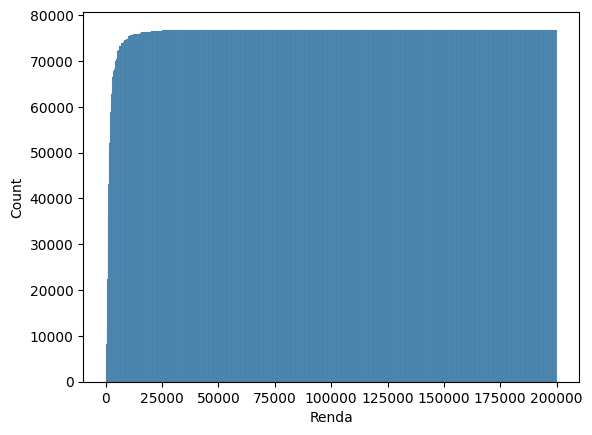

In [109]:
renda_quartil = dados.Renda.quantile([0.25, 0.5, 0.75])
renda_decil = dados.Renda.quantile([i/10 for i in range(1,10)])
renda_percentil = dados.Renda.quantile([i / 100 for i in range(1, 100)])

print(renda_quartil)
print(renda_decil)
renda_percentil

ax = sns.histplot(dados.Renda, cumulative = True, bins = 1000)

> ### Conclusões

Analisando o histograma dos dados de renda, vemos que a maior parte da população recebe até 2.000,00 mensalmente. A renda mais recebida pela população é de 788,00 (o valor do salário mínimo). Apesar de haver rendas entre 0,00 e 200.000,00, a renda média é 2.000,38. Essa renda média representa cerca de 75% da população da pesquisa.



### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

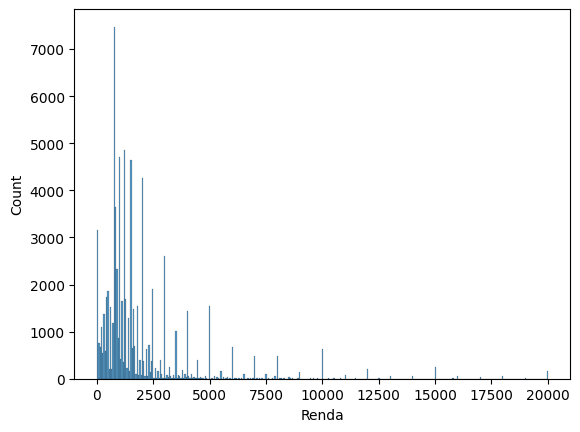

In [110]:
ax = sns.histplot(dados.query('Renda < 20001').Renda)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [111]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}



In [112]:
frequencia_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor)
frequencia_sexo_cor.rename(index = sexo, inplace=True)
frequencia_sexo_cor.rename(columns = cor, inplace=True)

frequencia_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [113]:
percentual_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor, normalize=True) * 100
percentual_sexo_cor.rename(index = sexo, inplace = True)
percentual_sexo_cor.rename(columns = cor, inplace = True)

percentual_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Para o sexo masculino, a grande maioria dos chefes de família são pardos e brancos, representando por volta de 32% e 28% respectivamente da população total. Já para o sexo feminino, o padrão se repete com mulheres pardas e brancas liderando com cerca de 14% e 12% respectivamente.

Em números, há mais homens chefes de família do que mulheres em qualquer cor.

Chama a atenção que tanto para os homens quanto para as mulheres, as pessoas de cor amarela e indígenas são a minoria como chefes de família.

Outro número que chama a atenção é que há mais mulheres pardas e brancas chefes de família do que homens pretos.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [114]:
dados.Renda.mean()

np.float64(2000.3831988547631)

### Obtenha a mediana

In [115]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [116]:
dados.Renda.mode()

,Renda
0,788


### Obtenha o desvio médio absoluto

In [117]:
print(f'Renda média: {renda_media}')

renda = dados[['Renda']]
renda['Desvio'] = (renda['Renda'] - renda_media).abs()
renda['Desvio'].mean()

Renda média: 2000.3831988547631


/tmp/ipython-input-1999387150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['Desvio'] = (renda['Renda'] - renda_media).abs()


np.float64(1526.4951371638058)

### Obtenha a variância

In [118]:
dados.Renda.var()

11044906.006217621

### Obtenha o desvio-padrão

In [119]:
dados.Renda.std()

3323.387730346494

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [120]:
renda_soma_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = 'sum', values = dados.Renda)
renda_soma_sexo_cor.rename(index = sexo, columns = cor, inplace = True)

renda_media_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor, aggfunc= 'mean', values = dados.Renda)
renda_media_sexo_cor.rename(index = sexo, columns = cor, inplace = True)
print(renda_media_sexo_cor)

renda_mediana_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = 'median', values = dados.Renda)
renda_mediana_sexo_cor.rename(index = sexo, columns = cor, inplace = True)
print(renda_mediana_sexo_cor)

renda_maxima_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = 'max', values = dados.Renda)
renda_maxima_sexo_cor.rename(index = sexo, columns = cor, inplace = True)
print(renda_maxima_sexo_cor)



Cor           Indígena       Branca        Preta      Amarela        Parda
Sexo                                                                      
Masculino  1081.710938  2925.744435  1603.861687  4758.251064  1659.577425
Feminino   2464.386139  2109.866750  1134.596400  3027.341880  1176.758516
Cor        Indígena  Branca   Preta  Amarela   Parda
Sexo                                                
Masculino     797.5  1700.0  1200.0   2800.0  1200.0
Feminino      788.0  1200.0   800.0   1500.0   800.0
Cor        Indígena  Branca  Preta  Amarela   Parda
Sexo                                               
Masculino     10000  200000  50000    50000  100000
Feminino     120000  100000  23000    20000   30000


> ### Conclusões

Com relação a média salarial, os homens de mesma cor que as mulheres ganham mais. A exceção é do homem indígena que tem uma média salarial inferior da mulher indígena. A cor amarela, para homens e mulheres, é a que possui maior média salarial. As cores preta e parda possuem médias salariais baixas para ambos os sexos.
Quando olhamos a mediana dos salários, vemos que o salário dos homens supera o das mulheres em todas as cores. Com exceção dos homens e das mulheres indígenas, os pontos anteriores se mantêm. A cor indígena é a que possui menor mediana salarial para ambos os sexos.
O salário máximo recebido pelos homens (exceto os indígenas) supera o das mulheres. O salário mais alto da mulher branca é a metade do que ganha o homem branco. Para as cores preta, amarela e parda, a mulher com salário mais alto ganha menos da metade do que o homem ganha. O salário mais alto da mulher indígena é mais de 10 vezes o salário mais alto do homem indígena.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [121]:
#renda_desvio_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor, aggfunc= lambda x: (x - x.mean()).abs().mean(), values = dados.Renda)
#renda_desvio_sexo_cor.rename(index = sexo, columns = cor, inplace = True)
#print(renda_desvio_sexo_cor)

#renda_varianca_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = 'var', values = dados.Renda)
#renda_varianca_sexo_cor.rename(index = sexo, columns = cor, inplace = True)
#print(renda_varianca_sexo_cor)

renda_desvio_padrao_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor, aggfunc = 'std', values = dados.Renda)
renda_desvio_padrao_sexo_cor.rename(index = sexo, columns = cor, inplace = True)
print(renda_desvio_padrao_sexo_cor)

Cor            Indígena       Branca        Preta     Amarela        Parda
Sexo                                                                      
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048


> ### Conclusões

Observando a renda, é possível notar que as mulheres indígenas possuem um desvio médio maior em relação a renda mensal que as mulheres de outra cor. Para os homens amarelos, o desvio médio é maior do que em relação aos homens de outras cores. Isso pode ser um indicador de que esses dois grupos possuem poucas pessoas com uma renda muito acima da média. Os homens indígenas possuem o menor desvio em relação a renda média, indicando que mais pessoas neste grupo ganham o mesmo salário. As mulheres pretas são as que possuem o menor desvio em relação aos demais grupos, indicando que possuem uma renda parecida.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda por Sexo e Cor'}, xlabel='R$', ylabel='Sexo'>

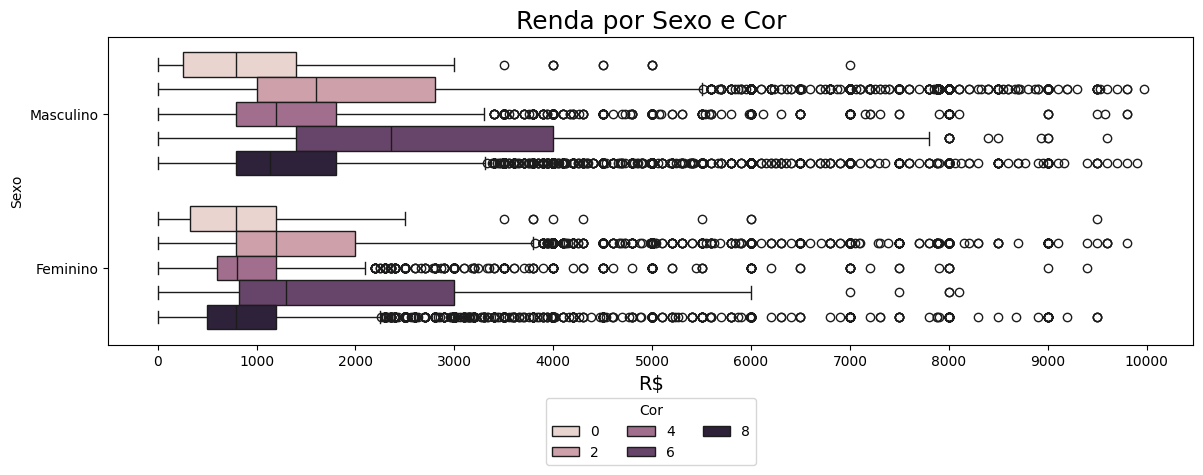

In [122]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), hue = 'Cor', orient = 'h')
ax.figure.set_size_inches(14, 4)
ax.set_title('Renda por Sexo e Cor', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax.set_yticks([0, 1], labels = ['Masculino', 'Feminino'])
ax.legend(title = 'Cor', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
#ax.legend(list(cor.values())[0:5], title = 'Cor', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
ax.set_xticks(ticks=([i for i in range (0, 10001, 1000)]))
ax


> ### Conclusões

Observando a renda por sexo e cor até R$10.000, vemos que a maior parte mulheres pretas e pardas possuem uma menor variação salarial entre si. As pessoas amarelas possuem os maiores salários. Em relação aos homens, é possível observar que as mulheres recebem salários menores. O homem indígena possui uma renda menor que das outras cores, principalmente da cor amarela. As pessoas pretas e pardas possuem rendas parecidas. A cor branca é a que possui os maiores salários em relação as outras cores.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [123]:
from scipy import stats

#usando percentileofscore
stats.percentileofscore(dados.Renda, 788, kind = 'weak')

#outra forma de fazer
dados.query('Renda <= 788').count() / dados.Renda.count() * 100

,0
UF,28.867777
Sexo,28.867777
Idade,28.867777
Cor,28.867777
Anos de Estudo,28.867777
Renda,28.867777
Altura,28.867777


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [124]:
dados.Renda.quantile(q = 0.99)

np.float64(15000.0)

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [125]:
print(dados.groupby(['Anos de Estudo', 'Sexo']).size())

renda_media_anos_sexo = pd.crosstab(dados['Anos de Estudo'], dados.Sexo, aggfunc= 'mean', values = dados.Renda)
renda_media_anos_sexo.rename(index = anos_de_estudo, columns = sexo, inplace = True)
print(renda_media_anos_sexo)

renda_mediana_anos_sexo = pd.crosstab(dados['Anos de Estudo'], dados.Sexo, aggfunc= 'median', values = dados.Renda)
renda_mediana_anos_sexo.rename(index = anos_de_estudo, columns = sexo, inplace = True)
print(renda_mediana_anos_sexo)

renda_maxima_anos_sexo = pd.crosstab(dados['Anos de Estudo'], dados.Sexo, aggfunc= 'max', values = dados.Renda)
renda_maxima_anos_sexo.rename(index = anos_de_estudo, columns = sexo, inplace = True)
print(renda_maxima_anos_sexo)

renda_desvio_anos_sexo = pd.crosstab(dados['Anos de Estudo'], dados.Sexo, aggfunc= 'std', values = dados.Renda)
renda_desvio_anos_sexo.rename(index = anos_de_estudo, columns = sexo, inplace = True)
print(renda_desvio_anos_sexo)

Anos de Estudo  Sexo
1               0        4476
                1        1373
2               0        1081
                1         307
3               0        1637
                1         464
4               0        2227
                1         664
5               0        5020
                1        1709
6               0        3247
                1        1252
7               0        1790
                1         655
8               0        1942
                1         747
9               0        5700
                1        2280
10              0        1287
                1         553
11              0        1499
                1         619
12              0       13933
                1        6915
13              0        1173
                1         663
14              0         827
                1         426
15              0         819
                1         569
16              0        6487
                1        4308
17              0  

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

/tmp/ipython-input-375409060.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([chave for chave in anos_de_estudo.values()])


[Text(0, 0, 'Sem instrução e menos de 1 ano'),
 Text(0, 1, '1 ano'),
 Text(0, 2, '2 anos'),
 Text(0, 3, '3 anos'),
 Text(0, 4, '4 anos'),
 Text(0, 5, '5 anos'),
 Text(0, 6, '6 anos'),
 Text(0, 7, '7 anos'),
 Text(0, 8, '8 anos'),
 Text(0, 9, '9 anos'),
 Text(0, 10, '10 anos'),
 Text(0, 11, '11 anos'),
 Text(0, 12, '12 anos'),
 Text(0, 13, '13 anos'),
 Text(0, 14, '14 anos'),
 Text(0, 15, '15 anos ou mais'),
 Text(0, 16, 'Não determinados')]

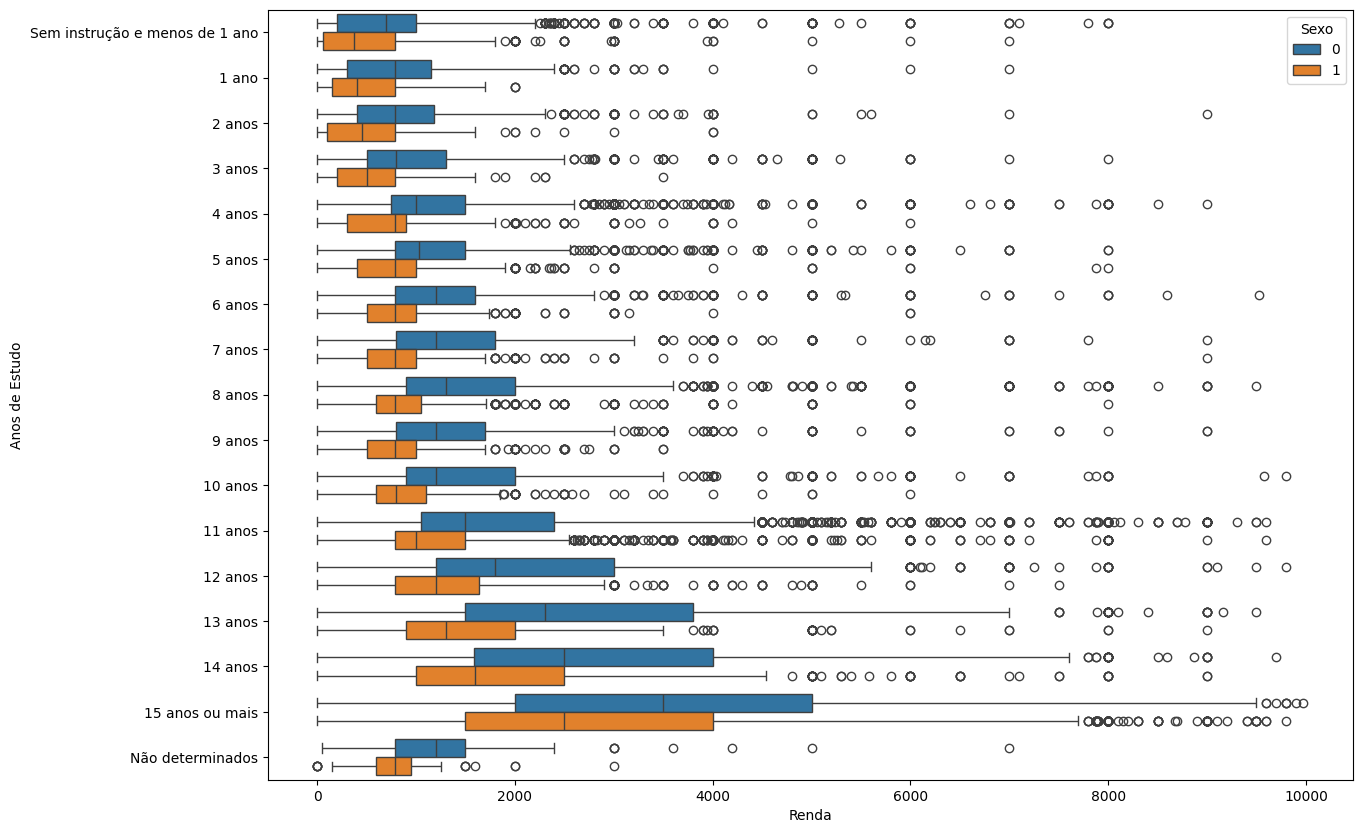

In [178]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', data = dados.query('Renda < 10000'), hue = 'Sexo', orient = 'h')
ax.figure.set_size_inches(14,10)
ax.set_yticklabels([chave for chave in anos_de_estudo.values()])

> ### Conclusões

Analisando graficamente a renda por tempo de estudo e por sexo, observamos que:

*   A mulher tendo o mesmo tempo de estudo que um homem possui uma renda menor
*   Quanto maior o tempo de estudo, maior a renda para ambos os sexos
*   A mulher necessita de 4 anos de estudo para obter uma renda próxima do homem que não possui instrução ou tem menos de 1 ano de estudo



### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [158]:
dados_renda_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
dados_renda_uf.index = dados_renda_uf.index.map(uf)
dados_renda_uf.Renda['mean'].sort_values()

,mean
UF,
Maranhão,1019.432009
Piauí,1074.550784
Sergipe,1109.111111
Alagoas,1144.552602
Ceará,1255.403692
Paraíba,1293.370487
Rio Grande do Norte,1344.721480
Pará,1399.076871
Bahia,1429.645094


O estado com a maior média salarial é o Distrito Federal, capital do Brasil, o valor é de 4.241,95 porém a maioria das pessoas ganha até 2.000,00. Nos estados de Bahia, Rio de Janeiro e Paraná vivem pessoas que possuem uma renda mensal de 200.000,00. O Distrito Federal e o Rio de Janeiro são os tados com maior desigualdade salarial do país, variando mais de 5.000,00 entre as pessoas.

O estado com menor média salarial é o Maranhão, com valor de 1.019,43, aí a maioria das pessoas ganha até 700,00. Em contraste com a super renda encontrada na Bahia (200.000,00), em Alagoas residem pessoas que ganham até 11.000,00. Alagoas é o estado que possui a menor desigualdade de renda, variando por volta de 1.200,00 entre as pessoas.

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

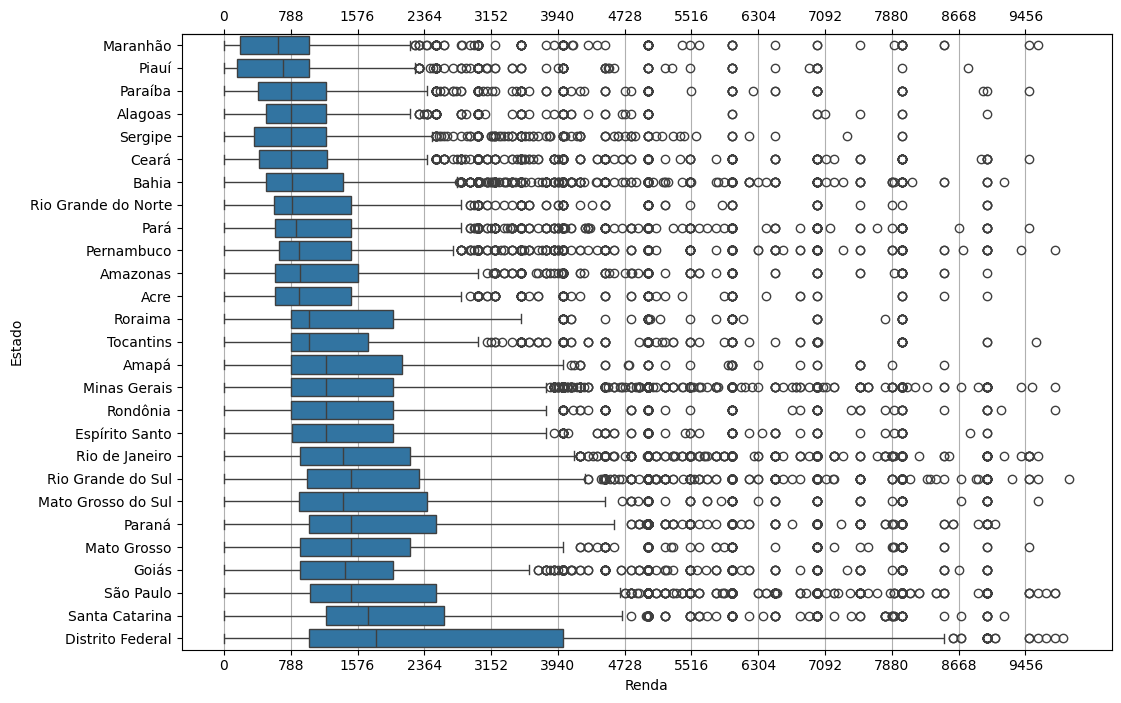

In [171]:
dados['Estado'] = dados['UF'].map(uf)
dados

ordem_estados = (dados.groupby('Estado')['Renda'].median().sort_values().index)

ax = sns.boxplot(x = 'Renda', y = 'Estado', data = dados.query('Renda < 10000'), order = ordem_estados, orient = 'h')
ax.figure.set_size_inches(12, 8)
ax.set_xticks(ticks=([i for i in range (0, 10001, 788)]))
ax.xaxis.grid(True)
ax_top = ax.secondary_xaxis('top')
ax_top.set_xticks(ticks=([i for i in range (0, 10001, 788)]))

> ### Conclusões

Analisando a distribuição da renda dos estados, com o filtro de quem ganha até 10.000,00, é possível observar que a maioria dos residentes em Maranhão e Piauí recebe menos que 1 salário mínimo mensalmente (788,00). A maioria dos estados que possui renda mensal próxima de 1 salário mínimo (788,00) fica na região Nordeste do país. Os únicos estados onde a maioria das pessoas recebe mais de 2 salários mínimos é Santa Catarina e Distrito Federal. No Distrito Federal é onde se nota a maior desigualdade de renda, variando de pouco mais de 1 salário mínimo para 5 salários mínimos entre as pessoas. Minas Gerais, Rondônia e Espírito Santo possuem uma distribuição de renda similar entre seus residentes que são chefes de família. Fora do eixo da região Nordeste, Mato Grosso e Goiás possuem uma distribuição de renda mais homogênea.